# Data Management

In [126]:
import numpy as np
import pandas as pd

In [127]:
data = {
    'name': ['ju', 'ma', 'lo', 'fi', 'na', 'pe', 'pe', 'jb', 'mp'],
    'age': [25, 36, 40, 18, 25, 40, 40, 18, 40],
    'time_since_birth': [25, 36, 40, 18, 25, 40, 40, 18, 40],
    'group': [1, 1, 2, 1, 1, 2, 2, np.nan, np.nan],
    'country': ['fr', 'gb', 'gb', 'fr', 'es', 'it', 'it', 'gb', 'fr'],
    'europe': [True, True, True, True, True,True, True, True, True],
    'patrimony': [3000, 7000, 2000, 60000, 8000000, 4000, 4000, np.nan, np.nan],
    'weight': [70, np.nan, np.nan, np.nan, np.nan, 90, 90, 60, np.nan],
    'size': [175, 180, 150, 190, np.nan, 170, 170, np.nan, np.nan],
    'comment': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
}
df = pd.DataFrame(data)
df

,name,age,time_since_birth,group,country,europe,patrimony,weight,size,comment
0,ju,25,25,1.0,fr,True,3000.0,70.0,175.0,NaN
1,ma,36,36,1.0,gb,True,7000.0,NaN,180.0,NaN
2,lo,40,40,2.0,gb,True,2000.0,NaN,150.0,NaN
3,fi,18,18,1.0,fr,True,60000.0,NaN,190.0,NaN
4,na,25,25,1.0,es,True,8000000.0,NaN,NaN,NaN
5,pe,40,40,2.0,it,True,4000.0,90.0,170.0,NaN
6,pe,40,40,2.0,it,True,4000.0,90.0,170.0,NaN
7,jb,18,18,NaN,gb,True,NaN,60.0,NaN,NaN
8,mp,40,40,NaN,fr,True,NaN,NaN,NaN,NaN


- *europe* is constant: must be dropped
- *time_since_birth* duplicate of *age*: must be dropped
- *comment* has only NA values: must be dropped
- 
- *group* has NA values: it is possible to perfectly reconstruct the values here
- *patrimony* has NA values: this will require a regression for getting an approximate reconstruction

## Select features (variables / columns)

### Drop constants

In [128]:
# Detect columns with a constant value
const_col = df.nunique() == 1
const_col

name                False
age                 False
time_since_birth    False
group               False
country             False
europe               True
patrimony           False
weight              False
size                False
comment             False
dtype: bool

In [129]:
# Drop these constant columns
df = df.T[~const_col].T
df

,name,age,time_since_birth,group,country,patrimony,weight,size,comment
0,ju,25,25,1.0,fr,3000.0,70.0,175.0,NaN
1,ma,36,36,1.0,gb,7000.0,NaN,180.0,NaN
2,lo,40,40,2.0,gb,2000.0,NaN,150.0,NaN
3,fi,18,18,1.0,fr,60000.0,NaN,190.0,NaN
4,na,25,25,1.0,es,8000000.0,NaN,NaN,NaN
5,pe,40,40,2.0,it,4000.0,90.0,170.0,NaN
6,pe,40,40,2.0,it,4000.0,90.0,170.0,NaN
7,jb,18,18,NaN,gb,NaN,60.0,NaN,NaN
8,mp,40,40,NaN,fr,NaN,NaN,NaN,NaN


### Drop duplicates

#### Duplicated rows

In [130]:
# See which row values are duplicated
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
dtype: bool

In [131]:
# Drop these duplicated rows
df.drop_duplicates(inplace=True)
df

,name,age,time_since_birth,group,country,patrimony,weight,size,comment
0,ju,25,25,1.0,fr,3000.0,70.0,175.0,NaN
1,ma,36,36,1.0,gb,7000.0,NaN,180.0,NaN
2,lo,40,40,2.0,gb,2000.0,NaN,150.0,NaN
3,fi,18,18,1.0,fr,60000.0,NaN,190.0,NaN
4,na,25,25,1.0,es,8000000.0,NaN,NaN,NaN
5,pe,40,40,2.0,it,4000.0,90.0,170.0,NaN
7,jb,18,18,NaN,gb,NaN,60.0,NaN,NaN
8,mp,40,40,NaN,fr,NaN,NaN,NaN,NaN


#### Duplicated columns

In [132]:
# See which column values are duplicated by transposing the matrix
dup_cols = df.T.duplicated()
dup_cols

name                False
age                 False
time_since_birth     True
group               False
country             False
patrimony           False
weight              False
size                False
comment             False
dtype: bool

In [133]:
# Drop these duplicated columns by transposing the cleaned DataFrame
df = df.T.drop_duplicates().T
df

,name,age,group,country,patrimony,weight,size,comment
0,ju,25,1.0,fr,3000.0,70.0,175.0,NaN
1,ma,36,1.0,gb,7000.0,NaN,180.0,NaN
2,lo,40,2.0,gb,2000.0,NaN,150.0,NaN
3,fi,18,1.0,fr,60000.0,NaN,190.0,NaN
4,na,25,1.0,es,8000000.0,NaN,NaN,NaN
5,pe,40,2.0,it,4000.0,90.0,170.0,NaN
7,jb,18,NaN,gb,NaN,60.0,NaN,NaN
8,mp,40,NaN,fr,NaN,NaN,NaN,NaN


## Drop columns with excessive proportion of missing values

In [134]:
# Great package for missing values analysis
import missingno

<AxesSubplot:>

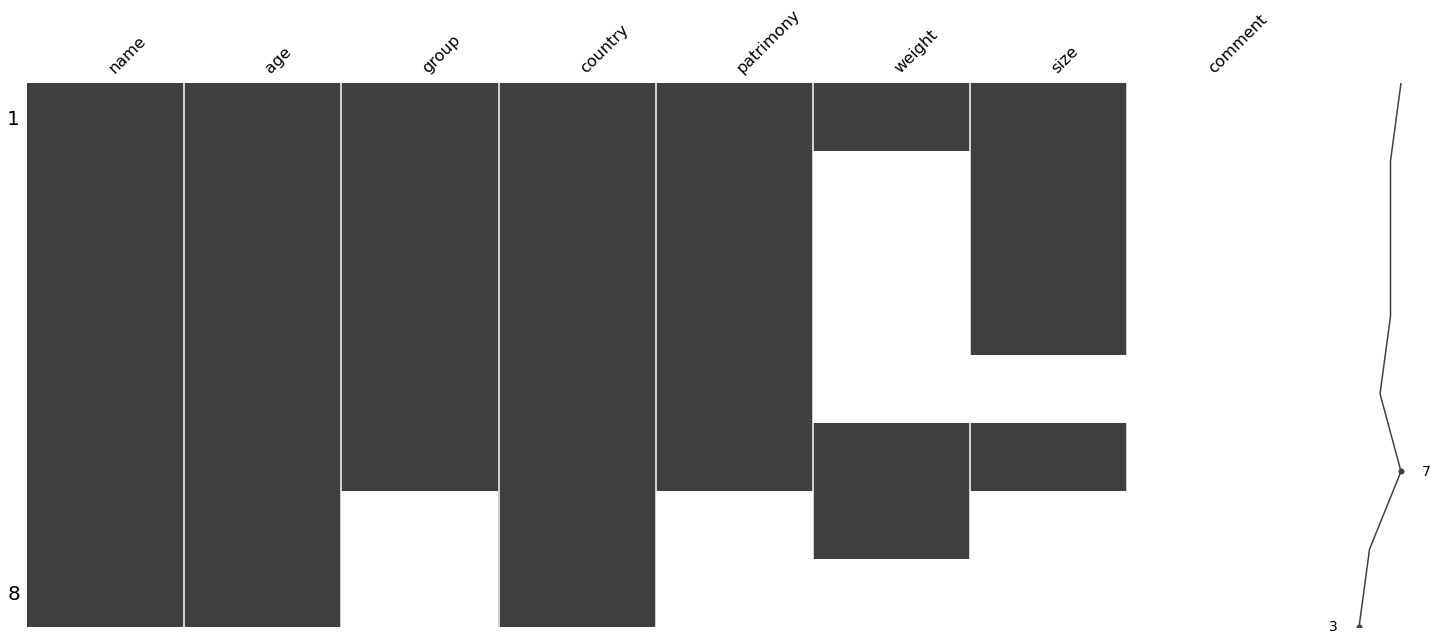

In [135]:
missingno.matrix(df)

### Only missing values (NA)

In [136]:
# See which columns have only NA values
df.isna().all()


name         False
age          False
group        False
country      False
patrimony    False
weight       False
size         False
comment       True
dtype: bool

In [137]:
# Drop columns with only NA values
df.dropna(axis=1, how='all', inplace=True)
df

,name,age,group,country,patrimony,weight,size
0,ju,25,1.0,fr,3000.0,70.0,175.0
1,ma,36,1.0,gb,7000.0,NaN,180.0
2,lo,40,2.0,gb,2000.0,NaN,150.0
3,fi,18,1.0,fr,60000.0,NaN,190.0
4,na,25,1.0,es,8000000.0,NaN,NaN
5,pe,40,2.0,it,4000.0,90.0,170.0
7,jb,18,NaN,gb,NaN,60.0,NaN
8,mp,40,NaN,fr,NaN,NaN,NaN


### Excessive proportion of missing values

In [138]:
df.isna().mean()

name         0.000
age          0.000
group        0.250
country      0.000
patrimony    0.250
weight       0.625
size         0.375
dtype: float64

In [139]:
# Create a mask for columns with more than 50% of NAs
excessive_na = df.isna().mean() > .5
excessive_na

name         False
age          False
group        False
country      False
patrimony    False
weight        True
size         False
dtype: bool

In [140]:
# Drop these columns
df = df.T[~excessive_na].T
df

,name,age,group,country,patrimony,size
0,ju,25,1.0,fr,3000.0,175.0
1,ma,36,1.0,gb,7000.0,180.0
2,lo,40,2.0,gb,2000.0,150.0
3,fi,18,1.0,fr,60000.0,190.0
4,na,25,1.0,es,8000000.0,NaN
5,pe,40,2.0,it,4000.0,170.0
7,jb,18,NaN,gb,NaN,NaN
8,mp,40,NaN,fr,NaN,NaN


### Excessive correlation between features

""
